In [1]:
## To enable voila extension uncomment and run the following 3 lines (not a requirement)
# !pip install voila
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix
# !jupyter serverextension enable voila --sys-prefix

## To enable appmode extension uncomment and run the following 3 lines (not a requirement)
# !pip install appmode
# !jupyter nbextension enable --py --sys-prefix appmode
# !jupyter serverextension enable --py --sys-prefix appmode

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML, Javascript
import sys
import os
from traitlets import traitlets

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import tree
import plotly.express as px

In [3]:
# Declaring Functions

In [4]:
## Model Inits/Plot Info

In [5]:
def init_nn(activation='tanh', alpha=0.001, l1_size=8, l2_size=4, l3_size=0, l4_size=0, lr=0.001):
    h_layer_sizes = (l1_size,)
    
    if l2_size != 0 and l3_size == 0 and l4_size == 0:
        h_layer_sizes = (l1_size, l2_size)
    elif l2_size != 0 and l3_size != 0 and l4_size == 0:
        h_layer_sizes = (l1_size, l2_size, l3_size)
    elif l2_size != 0 and l3_size != 0 and l4_size != 0:
        h_layer_sizes = (l1_size, l2_size, l3_size, l4_size)
            
    clf = MLPClassifier(activation=activation, solver='adam', alpha=alpha, hidden_layer_sizes=h_layer_sizes,
                    learning_rate="constant", learning_rate_init=lr,
                    random_state=42, max_iter=1, warm_start=True)
    return clf

def gradient_descent(X, y, lr=0.001, epoch=300, lmd = 0.01, reg='L2'):
    b1, b0 = 0.0, 0.0 # parameters
    b1_list, b0_list = [], []
    log, mse = [], [] # lists to store learning process
    
    for i in range(epoch):
        sumyhat = 0
        sumxyhat = 0

        reg_grad = 0

        if reg == 'L1':
            reg_grad = lmd
        elif reg == 'L2':
            reg_grad = 2*b1*lmd

        for j in range(len(X)):
            sumyhat += b0 + b1*X[j] + reg_grad - y[j]
            sumxyhat += (b0 + b1*X[j] + reg_grad - y[j])*(X[j])
            
        # CALCULATE AND UPDATE b1 AND b0
        b1 -= lr*(1/len(X))*sumxyhat
        b0 -= lr*(1/len(X))*sumyhat
        b1_list.append(b1)
        b0_list.append(b0)

        log.append((b1, b0))
        reg_term = 0

        if reg == 'L1':
            reg_term = lmd*np.sum(b1)
        elif reg == 'L2':
            reg_term = lmd*np.sum(b1*b1)

        mse.append(mean_squared_error(y, (b1*X + b0)) + reg_term)        

    return b1, b0, log, mse, b1_list, b0_list


def init_lr(alpha=0.001, lr=0.001, reg_type="L2"):
            
    clf = SGDClassifier(loss="log", penalty=reg_type.lower(), alpha=alpha, learning_rate="constant",
                    eta0=lr, max_iter=1, warm_start=True)
    return clf


def init_lsvm(alpha=0.001, lr=0.001, reg_type="L2"):
          
    clf = SGDClassifier(loss="hinge", penalty=reg_type.lower(), alpha=alpha, learning_rate="constant",
                    eta0=lr, max_iter=1, warm_start=True)
    return clf


def kmeans_cluster_centers(X, xx, yy, n_clusters=2, iterations=100):
    n_centroids = []
    labels = []
    Z_l = []
    centroids = None
    for i in range(iterations):
        clus = KMeans(
            max_iter=1,
            n_init=1,
            init=(centroids if centroids is not None else 'k-means++'),
            n_clusters=n_clusters,
            random_state=1)
        clus.fit(X)
        centroids = clus.cluster_centers_
        n_centroids.append(centroids)
        labels.append(clus.fit_predict(X))
        Z_l.append(clus.predict(np.c_[xx.ravel(), yy.ravel()]))
    return n_centroids, labels, Z_l


def init_gnb():
    
    clf = GaussianNB()
    return clf


def init_dtree(criterion='gini'):
    
    clf = DecisionTreeClassifier(criterion=criterion)
    return clf


def init_pca():
    
    pca = PCA()
    return pca


def init_svm(C=1, kernel='rbf', degree=3):
    
    clf = SVC(C=C, kernel=kernel, degree=degree)
    return clf
    

In [6]:
## Dataset Inits

In [7]:
def init_nn_dataset(dataset="Circular"):
    if dataset == "Circular":
        df = pd.read_csv(os.path.join("datasets", "classification_circle.csv"))
        df.loc[ df["y"] == -1, "y"] = 0 
    elif dataset == "XOR":
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df


def init_linreg_dataset(dataset="Linear"):
    if dataset == "Linear":
        df = pd.read_csv(os.path.join("datasets", "regression_linear_line.csv"))
    elif dataset == "Square Root":
        df = pd.read_csv(os.path.join("datasets", "regression_linear_square_root.csv"))    
    
    X = np.array(df['x'])
    y = np.array(df['y'])
    
    return X, y, df


def init_lr_dataset(dataset="Uniform"):
    if dataset == "Uniform":
        df = pd.read_csv(os.path.join("datasets", "classification_linear_uniform.csv"))
        df.loc[ df["y"] == -1, "y"] = 0  
    elif dataset == "XOR":
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df


def init_lsvm_dataset(dataset="Uniform"):
    if dataset == "Uniform":
        df = pd.read_csv(os.path.join("datasets", "classification_linear_uniform.csv"))
        df.loc[ df["y"] == -1, "y"] = 0  
    elif dataset == "XOR":
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df


def init_kmeans_dataset(dataset='4 Cluster'):
    if dataset == '4 Cluster':
        df = pd.read_csv(os.path.join("datasets", "clustering_4clusters.csv"))
    elif dataset == 'Uniform':
        df = pd.read_csv(os.path.join("datasets", "classification_linear_uniform.csv"))
    elif dataset == 'XOR':
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
    elif dataset == 'With Outliers':
        df = pd.read_csv(os.path.join("datasets", "classification_clustering_outliers.csv"))
        df["x1"] = df["x"]
        df["x2"] = df["y"]
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    
    return X, df


def init_gnb_dataset(dataset="Independent"):
    if dataset == "Independent":
        df = pd.read_csv(os.path.join("datasets", "classification_naive_bayes_bernoulli_independent.csv"))
        df.loc[ df["y"] == -1, "y"] = 0 
    elif dataset == "Dependent":
        df = pd.read_csv(os.path.join("datasets", "classification_dependent_feature.csv"))
        df.loc[ df["y"] == -1, "y"] = 0 
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df


def init_dtree_dataset(dataset="XOR"):
    if dataset == "Uniform":
        df = pd.read_csv(os.path.join("datasets", "classification_linear_uniform.csv"))
        df.loc[ df["y"] == -1, "y"] = 0  
    elif dataset == "XOR":
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df


def init_pca_dataset(dataset="Uniform"):
    if dataset == "Uniform":
        df = pd.read_csv(os.path.join("datasets", "classification_linear_uniform.csv"))
        df.loc[ df["y"] == -1, "y"] = 0  
    elif dataset == "XOR":
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    elif dataset == "Circular":
        df = pd.read_csv(os.path.join("datasets", "classification_circle.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df


def init_svm_dataset(dataset="XOR"):
    if dataset == "Uniform":
        df = pd.read_csv(os.path.join("datasets", "classification_linear_uniform.csv"))
        df.loc[ df["y"] == -1, "y"] = 0 
    elif dataset == "Circular":
        df = pd.read_csv(os.path.join("datasets", "classification_circle.csv"))
        df.loc[ df["y"] == -1, "y"] = 0 
    elif dataset == "XOR":
        df = pd.read_csv(os.path.join("datasets", "classification_nonlinear_xor.csv"))
        df.loc[ df["y"] == -1, "y"] = 0
    
    feature_cols = ['x1', 'x2']
    X = df[feature_cols].to_numpy()
    y = df['y'].to_numpy()
    
    return X, y, df

In [8]:
## Animations

In [9]:
def animate_nn(i, *fargs):
    clf, X, y, df, xx, yy = fargs
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.cla()
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    alpha = 0.7,
    cmap=plt.cm.Paired
    )
    contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title("Iteration: {}".format(i+1))
    plt.legend(loc='lower right')
    
    
def animate_linreg(i, *fargs):
    X, y, w_list, b_list = fargs 
    
    plt.cla()
    sns.scatterplot(x=X, y=y)
    y_graph = w_list[i-1]*X + b_list[i-1]
    plt.title("Iteration: {}".format(i+1))
    plt.plot(X, y_graph, 'r', linewidth=2.5)

    
def animate_lr(i, *fargs):
    clf, X, y, df = fargs
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    clf.fit(X, y)
    
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    theta = -w1/w2

    xd = np.array([xmin, xmax])
    yd = theta*xd + b
    
    plt.cla()
    plt.plot(xd, yd, 'w', lw=3)
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.title("Iteration: {}".format(i+1))
    plt.legend(loc='lower right')

    
def animate_lsvm(i, *fargs):
    clf, X, y, df = fargs
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    clf.fit(X, y)
    
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    theta = -w1/w2

    xd = np.array([xmin, xmax])
    yd = theta*xd + b
    
    plt.cla()
    plt.plot(xd, yd, 'w', lw=3)
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.title("Iteration: {}".format(i+1))
    plt.legend(loc='lower right')


def animate_kmeans(i, *fargs):
    n_centroids, labels, Z_l, df, xx, yy, inter = fargs
    
    plt.cla()
    Z = Z_l[i].reshape(xx.shape)
    plt.imshow(
    Z,
    interpolation=inter,
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    alpha=0.5,
    aspect="auto",
    origin="lower",
    )
    sns.scatterplot(x="x1", y="x2", hue=labels[i], palette="deep", data=df)
    centroids = n_centroids[i]
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=80,
        linewidths=3,
        color="black",
        zorder=10,
    )
    plt.title("Iteration: {}".format(i+1))
    plt.legend(loc='lower right')
        

In [10]:
## Plays/Plots

In [11]:
def play_nn(activation='tanh', alpha=0.001, l1_size=8, l2_size=4, l3_size=0,
            l4_size=0, lr=0.001, dataset='Circular', epoch=300):
    
    anim_running = True
    
    def onClick(event): # start/stop animation when clicked on figure 
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True
    
    plt.clf() # clear figure  
    clf = init_nn(activation=activation, alpha=alpha, l1_size=l1_size, l2_size=l2_size, l3_size=l3_size,
                  l4_size=l4_size, lr=lr)    
    X, y, df = init_nn_dataset(dataset=dataset)
    
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(xmin, xmax, 500))
    plt.gcf().canvas.mpl_connect('button_press_event', onClick) # connects the figure with the onClick func
    anim = FuncAnimation(plt.gcf(), func=animate_nn, fargs=(clf, X, y, df, xx, yy), interval=100,
                         repeat=False, frames=epoch, blit=True)
    return anim


def play_linreg(alpha=0.001, reg_type="L2", lr=0.001, dataset='Linear', epoch=300):
    
    anim_running = True
    
    def onClick(event): # start/stop animation when clicked on figure 
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True
    
    plt.clf()
    X, y, df = init_linreg_dataset(dataset=dataset)
    w, b, _, _, w_list, b_list = gradient_descent(X=X, y=y, lr=lr, epoch=epoch, lmd=alpha,
                                                  reg=reg_type)
    
    plt.gcf().canvas.mpl_connect('button_press_event', onClick) # connects the figure with the onClick func
    anim = FuncAnimation(plt.gcf(), func=animate_linreg, fargs=(X, y, w_list, b_list),
                        repeat=False, frames=epoch, interval=20)
    return anim


def play_lr(alpha=0.001, reg_type="L2", lr=0.001, dataset='Uniform', epoch=300):
    
    anim_running = True

    def onClick(event): # start/stop animation when clicked on figure 
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True
        
    plt.clf() # clear figure 
    clf = init_lr(alpha=alpha, lr=lr, reg_type=reg_type)
    X, y, df = init_lr_dataset(dataset=dataset)
    plt.gcf().canvas.mpl_connect('button_press_event', onClick) # connects the figure with the onClick func
    anim = FuncAnimation(plt.gcf(), func=animate_lr, fargs=(clf, X, y, df), interval=100,
                         repeat=False, frames=epoch, blit=True)
    return anim


def play_lsvm(alpha=0.001, reg_type="L2", lr=0.001, dataset='Uniform', epoch=300):
    
    anim_running = True

    def onClick(event): # start/stop animation when clicked on figure 
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True
        
    plt.clf() # clear figure 
    clf = init_lsvm(alpha=alpha, lr=lr, reg_type=reg_type)
    X, y, df = init_lsvm_dataset(dataset=dataset)
    plt.gcf().canvas.mpl_connect('button_press_event', onClick) # connects the figure with the onClick func
    anim = FuncAnimation(plt.gcf(), func=animate_lsvm, fargs=(clf, X, y, df), interval=100,
                         repeat=False, frames=epoch, blit=True)
    return anim


def play_kmeans(n_clusters=3, dataset='4 Cluster', epoch=300):
    
    anim_running = True
    
    def onClick(event): # start/stop animation when clicked on figure 
        nonlocal anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True
    
    plt.clf() # clear figure     
    X, df = init_kmeans_dataset(dataset=dataset)
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))
    
    plt.gcf().canvas.mpl_connect('button_press_event', onClick) # connects the figure with the onClick func
    n_centroids, labels, Z_l = kmeans_cluster_centers(X, xx, yy, n_clusters=n_clusters, iterations=50)
    anim = FuncAnimation(plt.gcf(),
                            func = animate_kmeans,
                            fargs=(n_centroids, labels, Z_l, df, xx, yy, "none"),
                            repeat=False, frames=epoch,
                            interval = 800)
    return anim


def plot_gnb(dataset='Independent'):
    plt.clf()
    X, y, df = init_gnb_dataset(dataset=dataset)
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    
    clf = init_gnb()
    clf.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)

    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
        alpha=0.7
    )

    contours = plt.contour(xx, yy, Z, linewidths=1, colors="white", alpha=0.1)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')
    plt.show()
    

def plot_dtree(criterion='entropy', dataset='XOR'):
    plt.clf()
    X, y, df = init_dtree_dataset(dataset=dataset)
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    
    clf = init_dtree(criterion=criterion)
    clf.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(
            Z,
            interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            aspect="auto",
            origin="lower",
            cmap=plt.cm.Paired,
            alpha=0.7
        )

    contours = plt.contour(xx, yy, Z, linewidths=2, colors="white", alpha=1)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')
    plt.show()
    fig = plt.figure(figsize=(8,4))
    _ = tree.plot_tree(clf, 
                       filled=True)


def plot_pca(dataset='Uniform'):
    plt.clf()
    X, y, df = init_pca_dataset(dataset=dataset)
    
    pca = init_pca()
    components = pca.fit_transform(X)
    labels = {
        str(i): f"PC {i+1} ({var:.1f}%)"
        for i, var in enumerate(pca.explained_variance_ratio_ * 100)
    }

    fig = px.scatter_matrix(
        components,
        labels=labels,
        dimensions=range(2),
        color=df["y"]
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()


def plot_svm(C=1, kernel='rbf', degree=3, dataset='XOR'):
    if C == 0:
        C = 0.00001
    plt.clf()
    X, y, df = init_svm_dataset(dataset=dataset)
    xmin, xmax = df["x1"].min(), df["x1"].max() 
    ymin, ymax = df["x2"].min(), df["x2"].max()
    
    clf = init_svm(C=C, kernel=kernel, degree=degree)
    clf.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )

    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="black")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')
    plt.show()

In [12]:
## Kernel Control

In [13]:
def run_below(btn_state):
    btn_state.value = "RUN"
    
    display(HTML(
        '''
            <script>
                code_show = false;
                function run_below(){
                    IPython.notebook.execute_cells_below();
                    
                }
                function code_toggle() {
                    if (code_show) {
                        $('div.input').hide(200);
                    } else {
                        $('div.input').show(200);
                    }
                    code_show = !code_show
                }
                code_toggle() 
                run_below()
            </script>

        '''
    ))

In [14]:
# Declaring Widgets

In [15]:
class LoadedButton(widgets.Button):
    """A custom button that can holds a value as a attribute."""

    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))

In [16]:
algorithms = ['Linear Regression', 'Logistic Regression', 'Neural Network', 'Linear SVM', 'Non-linear SVM', 'KMeans',
             'Naive Bayes', 'Decision Tree', 'PCA', 'None']

style = {'description_width': 'initial'}
output = widgets.Output()

algo_dropdown = widgets.Dropdown(
            options=algorithms,
            value='None',
            description='Algorithm:',
            disabled=False,
        )

activation_dropdown = widgets.Dropdown(
            options=['logistic', 'tanh', 'relu'],
            value='tanh',
            description='Activation:',
            disabled=False,
            style=style
        )

lr_slider = widgets.BoundedFloatText(
            value=0.001,
            min=0.0001,
            max=1.0,
            step=0.0001,
            description='Learning Rate:',
            disabled=False,
            style=style
        )

reg_strength_slider = widgets.BoundedFloatText(
            value=0.001,
            min=0.0,
            max=1.0,
            step=0.0001,
            description='Regularization Strength:',
            disabled=False,
            style=style
        )

epoch_text = widgets.BoundedIntText(
            value=300,
            min=10,
            max=1000,
            step=10,
            description='Epochs:',
            disabled=False,
            style=style
        )

regtype_dropdown = widgets.Dropdown(
            options=['L1', 'L2', 'None'],
            value='L2',
            description='Regularization Type:',
            disabled=False,
            style=style
        )

n_clusters_slider = widgets.IntSlider(
            value=3,
            min=1,
            max=7,
            step=1,
            description='No. of Clusters:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style=style
        )

dtree_criterion_dropdown = widgets.Dropdown(
            options=['gini', 'entropy'],
            value='entropy',
            description='Criterion:',
            disabled=False,
            style=style
        )

poly_deg_slider = widgets.IntSlider(
            value=3,
            min=1,
            max=5,
            step=1,
            description='Polynomial Degree:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style=style
        )

svm_kernel_dropdown = widgets.Dropdown(
            options=['rbf', 'linear', 'poly', 'sigmoid'],
            value='rbf',
            description='Kernel:',
            disabled=False,
            style=style
        )

l1_dropdown = widgets.Dropdown(
            options=[1, 2, 4, 8],
            value=8,
            description='L1 Size:',
            disabled=False,
            style=style
        )

l2_dropdown = widgets.Dropdown(
            options=[0, 1, 2, 4, 8],
            value=4,
            description='L2 Size:',
            disabled=False,
            style=style
        )

l3_dropdown = widgets.Dropdown(
            options=[0, 1, 2, 4, 8],
            value=0,
            description='L3 Size:',
            disabled=False,
            style=style
        )

l4_dropdown = widgets.Dropdown(
            options=[0, 1, 2, 4, 8],
            value=0,
            description='L4 Size:',
            disabled=False,
            style=style
        )

dataset_nn_dropdown = widgets.Dropdown(
            options=['Circular', 'XOR'],
            value='Circular',
            description='Dataset',
            disabled=False,
        )

dataset_linreg_dropdown = widgets.Dropdown(
            options=['Linear', 'Square Root'],
            value='Linear',
            description='Dataset',
            disabled=False,
        )

dataset_lr_dropdown = widgets.Dropdown(
            options=['Uniform', 'XOR'],
            value='XOR',
            description='Dataset',
            disabled=False,
        )

dataset_lsvm_dropdown = widgets.Dropdown(
            options=['Uniform', 'XOR'],
            value='XOR',
            description='Dataset',
            disabled=False,
        )

dataset_kmeans_dropdown = widgets.Dropdown(
            options=['Uniform', 'XOR', 'With Outliers', '4 Cluster'],
            value='4 Cluster',
            description='Dataset',
            disabled=False,
        )

dataset_gnb_dropdown = widgets.Dropdown(
            options=['Independent', 'Dependent'],
            value='Independent',
            description='Dataset',
            disabled=False,
        )

dataset_dtree_dropdown = widgets.Dropdown(
            options=['Uniform', 'XOR'],
            value='XOR',
            description='Dataset',
            disabled=False,
        )

dataset_pca_dropdown = widgets.Dropdown(
            options=['Uniform', 'XOR', 'Circular'],
            value='Uniform',
            description='Dataset',
            disabled=False,
        )

dataset_svm_dropdown = widgets.Dropdown(
            options=['Uniform', 'XOR', 'Circular'],
            value='Circular',
            description='Dataset',
            disabled=False,
        )


play_plot_btn = LoadedButton(description="Play/Plot")
anim = None

In [17]:
# Main 

In [18]:
if sys.platform == "win32": # using widget backend for windows; nbagg othwerwise
    %matplotlib widget
    %matplotlib widget
else:
    %matplotlib notebook
    %matplotlib notebook

def tune_hyperparams(algo='None'):
    if algo == "Linear Regression":
        hb = widgets.HBox([lr_slider, reg_strength_slider])
        vb = widgets.VBox([regtype_dropdown, hb, dataset_linreg_dropdown, epoch_text, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
    
    elif algo == "Logistic Regression":
        hb = widgets.HBox([lr_slider, reg_strength_slider])
        vb = widgets.VBox([regtype_dropdown, hb, dataset_lr_dropdown, epoch_text, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
        
    elif algo == "Neural Network":
        hb1 = widgets.HBox([lr_slider, reg_strength_slider])
        hb2 = widgets.HBox([l1_dropdown, l2_dropdown, l3_dropdown, l4_dropdown])
        vb = widgets.VBox([activation_dropdown, hb1, hb2, dataset_nn_dropdown, epoch_text, play_plot_btn, output])
        display(vb)  
        play_plot_btn.on_click(run_below)

    elif algo == "Linear SVM":
        hb = widgets.HBox([lr_slider, reg_strength_slider])
        vb = widgets.VBox([regtype_dropdown, hb, dataset_lsvm_dropdown, epoch_text, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
    
    elif algo == "KMeans":
        vb = widgets.VBox([dataset_kmeans_dropdown, n_clusters_slider, epoch_text, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
    
    elif algo == "Naive Bayes":
        vb = widgets.VBox([dataset_gnb_dropdown, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
    
    elif algo == "Decision Tree":
        vb = widgets.VBox([dataset_dtree_dropdown, dtree_criterion_dropdown, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
    
    elif algo == "PCA":
        vb = widgets.VBox([dataset_pca_dropdown, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)
    
    elif algo == "Non-linear SVM":
        hb = widgets.HBox([svm_kernel_dropdown, poly_deg_slider])
        vb = widgets.VBox([dataset_svm_dropdown, hb, reg_strength_slider, play_plot_btn, output])
        display(vb)
        play_plot_btn.on_click(run_below)

In [19]:
def run():
    if play_plot_btn.value == "RUN":
        global anim
        if anim is not None:
            if anim.event_source is not None:
                anim.event_source.stop()
                anim = None
        plt.close('all')

        if algo_dropdown.value == "Linear Regression":
            anim = play_linreg(alpha=reg_strength_slider.value,
                    reg_type=regtype_dropdown.value,
                    lr=lr_slider.value,
                    dataset=dataset_linreg_dropdown.value,
                    epoch=epoch_text.value)

        elif algo_dropdown.value == "Logistic Regression":
            anim = play_lr(alpha=reg_strength_slider.value,
                    reg_type=regtype_dropdown.value,
                    lr=lr_slider.value,
                    dataset=dataset_lr_dropdown.value,
                    epoch=epoch_text.value)

        elif algo_dropdown.value == "Neural Network":
            anim = play_nn(activation=activation_dropdown.value,
                    alpha=reg_strength_slider.value,
                    l1_size=l1_dropdown.value,
                    l2_size=l2_dropdown.value, l3_size=l3_dropdown.value,
                    l4_size=l4_dropdown.value, lr=lr_slider.value,
                    dataset=dataset_nn_dropdown.value,
                    epoch=epoch_text.value)

        elif algo_dropdown.value == "Linear SVM":
            anim = play_lsvm(alpha=reg_strength_slider.value,
                    reg_type=regtype_dropdown.value,
                    lr=lr_slider.value,
                    dataset=dataset_lsvm_dropdown.value,
                    epoch=epoch_text.value)

        elif algo_dropdown.value == "KMeans":
            anim = play_kmeans(n_clusters=n_clusters_slider.value,
                    dataset=dataset_kmeans_dropdown.value,
                    epoch=epoch_text.value)

        elif algo_dropdown.value == "Naive Bayes":
            anim = plot_gnb(dataset=dataset_gnb_dropdown.value)

        elif algo_dropdown.value == "Decision Tree":
            anim = plot_dtree(criterion=dtree_criterion_dropdown.value,
                    dataset=dataset_dtree_dropdown.value)

        elif algo_dropdown.value == "PCA":
            anim = plot_pca(dataset=dataset_pca_dropdown.value)

        elif algo_dropdown.value == "Non-linear SVM":
            anim = plot_svm(kernel=svm_kernel_dropdown.value,
                    C=reg_strength_slider.value,
                    degree=poly_deg_slider.value,
                    dataset=dataset_svm_dropdown.value) 

# Notes:
1. Installing Appmode/Voila is NOT a requirement to run this project.
2. The notebook works best in Google Chrome.
3. The notebook is fully interactive using the UI/widgets.
4. You can pause/play the animations by clicking on the figure.
5. Iterative algorithms are animated while non-iterative ones are plotted.
6. You can save any of the plots as PNG using the save button on the bottom of the bar that appears while hovering on the figure.
7. The code was intended to be as modular as possible. So, feel free to clone/fork the repo and add your own datasets, algortihms, widgets, etc.
8. Known issue: Non-linear SVM takes a few seconds to plot. A fix will come soon hopefully.
9. Enjoy!

In [20]:
widgets.interact(tune_hyperparams, algo=algo_dropdown);

interactive(children=(Dropdown(description='Algorithm:', index=9, options=('Linear Regression', 'Logistic Regr…

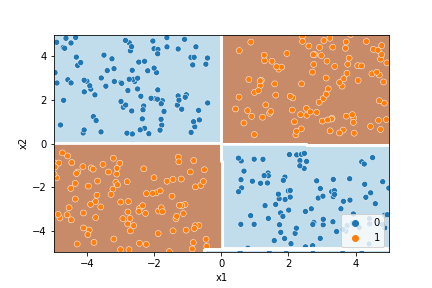

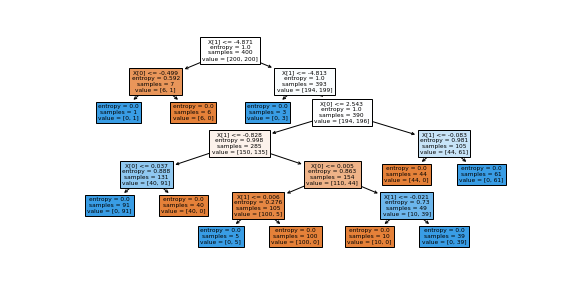

In [25]:
run()